In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
df_10k = pd.read_csv('/Users/apple/Downloads/League Of Legends Data/Sep-09-2022_10000matches.csv')
df_500 = pd.read_csv('/Users/apple/Downloads/League Of Legends Data/Sep-29-2022_500matches.csv')

In [4]:
print(f"Dataset 1 (10k matches): {df_10k.shape[0]:,} rows, {df_10k.shape[1]} columns")
print(f"Dataset 2 (500 matches): {df_500.shape[0]:,} rows, {df_500.shape[1]} columns")

Dataset 1 (10k matches): 100,001 rows, 69 columns
Dataset 2 (500 matches): 5,001 rows, 69 columns


In [5]:
df_10k.head()

,Unnamed: 0,assists,GameID,GameMode,baronKills,bountyLevel,champExperience,champLevel,championName,damageDealtToObjectives,damageSelfMitigated,deaths,dragonKills,firstBloodAssist,firstBloodKill,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,kills,lane,largestCriticalStrike,largestKillingSpree,longestTimeSpentLiving,magicDamageDealtToChampions,magicDamageTaken,nexusLost,objectivesStolen,physicalDamageDealtToChampions,physicalDamageTaken,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,teamEarlySurrendered,teamId,timeCCingOthers,timePlayed,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,trueDamageDealtToChampions,trueDamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,20,NA1_4430908515,ARAM,0,0,14531,15,Ashe,112,3250,3,0,True,False,False,11358,10550,Invalid,0,1,4005,3042,3158,6696,3123,1036,0,6,NONE,127,6,534,8238,3482,1,0,13940,4201,3,170,16,18,3,13,1,4,LSOs6T6xBc4N92a07JWjsAyqvGCzZYUlJGD5-dTKKygsgu0,False,100,80,1037,22976,0,8149,1841,0,27,719,74,797,465,1,4,5,0,0,0,False
1,0,3,4035079604,CLASSIC,0,3,15453,16,Sett,18147,30659,6,0,False,False,True,14062,11650,TOP,0,0,3047,6630,3153,3075,1028,1036,3340,15,JUNGLE,12,7,414,678,4518,0,0,20578,24466,60,14,23,8,7,14,4,4,EQVwBXUPeravpsqdQVrS3VcZSJJ477gSW-bJY54xpv6ECSo,False,100,27,1657,23814,0,29672,4672,0,132,131,156,2556,686,4,4,10,0,0,7,True
2,0,19,4035079604,CLASSIC,0,3,13168,15,Trundle,27626,28297,4,2,True,False,True,10577,9500,JUNGLE,0,0,3075,2031,3044,3047,6632,1037,3340,4,JUNGLE,18,3,307,2363,5253,0,0,12428,26384,139,61,28,8,19,11,4,4,4EO1Lj5f26DxFkubiJbFbQRFJjIf3zXnz17ifqsOQJEqMPg,False,100,22,1657,15748,0,33209,20117,0,18,434,82,956,1571,6,4,21,3,0,11,True
3,0,6,4035079604,CLASSIC,0,1,13619,15,Sylas,10629,19937,5,1,True,False,True,13858,11650,MIDDLE,1,0,4629,3157,6656,3020,1082,1058,3340,18,MIDDLE,0,11,627,28722,6237,0,0,1081,20683,99,62,163,17,5,14,3,4,kcwayPs2n_YEPeuad0uELRycMIHbOEv_j5He2JTOAWuPcpM,False,100,29,1657,30404,0,27856,10474,0,148,323,127,600,935,6,4,8,0,0,5,True
4,0,7,4035079604,CLASSIC,1,1,10674,13,KogMaw,13624,6303,6,0,False,False,True,9292,8525,BOTTOM,0,0,6672,3085,1043,1055,3006,0,3340,5,BOTTOM,397,3,494,4903,4570,0,0,3471,10682,38,42,38,37,4,4,4,7,6V_t8aG11ISrjtD6Fe5q7u9VpIBNexVEQkXVyA5lOu3rTTn2,False,100,5,1657,10578,0,15774,4356,419,119,240,118,2202,521,3,4,3,1,1,2,True


In [6]:
df_500.head()

,Unnamed: 0,assists,GameID,GameMode,baronKills,bountyLevel,champExperience,champLevel,championName,damageDealtToObjectives,damageSelfMitigated,deaths,dragonKills,firstBloodAssist,firstBloodKill,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,kills,lane,largestCriticalStrike,largestKillingSpree,longestTimeSpentLiving,magicDamageDealtToChampions,magicDamageTaken,nexusLost,objectivesStolen,physicalDamageDealtToChampions,physicalDamageTaken,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,teamEarlySurrendered,teamId,timeCCingOthers,timePlayed,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,trueDamageDealtToChampions,trueDamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,14,NA1_4440772554,ARAM,0,0,19848,18,Yasuo,1978,36956,14,0,False,False,False,13207,11550,Invalid,0,2,3184,3143,6673,3033,3009,0,0,6,NONE,464,2,126,1874,10682,1,0,17206,20493,131,17,107,5,1,4,6,1,vjzHPKnlOgoD1ue7VQ-U9O0NNBmwFQSXTwnLRhnLXMWaLXs,False,100,17,1198,19080,0,32038,935,0,69,99,320,0,862,1,4,0,0,0,0,False
1,0,3,4035079604,CLASSIC,0,3,15453,16,Sett,18147,30659,6,0,False,False,True,14062,11650,TOP,0,0,3047,6630,3153,3075,1028,1036,3340,15,JUNGLE,12,7,414,678,4518,0,0,20578,24466,60,14,23,8,7,14,4,4,EQVwBXUPeravpsqdQVrS3VcZSJJ477gSW-bJY54xpv6ECSo,False,100,27,1657,23814,0,29672,4672,0,132,131,156,2556,686,4,4,10,0,0,7,True
2,0,19,4035079604,CLASSIC,0,3,13168,15,Trundle,27626,28297,4,2,True,False,True,10577,9500,JUNGLE,0,0,3075,2031,3044,3047,6632,1037,3340,4,JUNGLE,18,3,307,2363,5253,0,0,12428,26384,139,61,28,8,19,11,4,4,4EO1Lj5f26DxFkubiJbFbQRFJjIf3zXnz17ifqsOQJEqMPg,False,100,22,1657,15748,0,33209,20117,0,18,434,82,956,1571,6,4,21,3,0,11,True
3,0,6,4035079604,CLASSIC,0,1,13619,15,Sylas,10629,19937,5,1,True,False,True,13858,11650,MIDDLE,1,0,4629,3157,6656,3020,1082,1058,3340,18,MIDDLE,0,11,627,28722,6237,0,0,1081,20683,99,62,163,17,5,14,3,4,kcwayPs2n_YEPeuad0uELRycMIHbOEv_j5He2JTOAWuPcpM,False,100,29,1657,30404,0,27856,10474,0,148,323,127,600,935,6,4,8,0,0,5,True
4,0,7,4035079604,CLASSIC,1,1,10674,13,KogMaw,13624,6303,6,0,False,False,True,9292,8525,BOTTOM,0,0,6672,3085,1043,1055,3006,0,3340,5,BOTTOM,397,3,494,4903,4570,0,0,3471,10682,38,42,38,37,4,4,4,7,6V_t8aG11ISrjtD6Fe5q7u9VpIBNexVEQkXVyA5lOu3rTTn2,False,100,5,1657,10578,0,15774,4356,419,119,240,118,2202,521,3,4,3,1,1,2,True


In [7]:
df_combined = pd.concat([df_10k, df_500], ignore_index=True)
print(f"\nCombined dataset: {df_combined.shape[0]:,} rows, {df_combined.shape[1]} columns")


df_combined.head()



Combined dataset: 105,002 rows, 69 columns


,Unnamed: 0,assists,GameID,GameMode,baronKills,bountyLevel,champExperience,champLevel,championName,damageDealtToObjectives,damageSelfMitigated,deaths,dragonKills,firstBloodAssist,firstBloodKill,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,kills,lane,largestCriticalStrike,largestKillingSpree,longestTimeSpentLiving,magicDamageDealtToChampions,magicDamageTaken,nexusLost,objectivesStolen,physicalDamageDealtToChampions,physicalDamageTaken,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,teamEarlySurrendered,teamId,timeCCingOthers,timePlayed,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,trueDamageDealtToChampions,trueDamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,20,NA1_4430908515,ARAM,0,0,14531,15,Ashe,112,3250,3,0,True,False,False,11358,10550,Invalid,0,1,4005,3042,3158,6696,3123,1036,0,6,NONE,127,6,534,8238,3482,1,0,13940,4201,3,170,16,18,3,13,1,4,LSOs6T6xBc4N92a07JWjsAyqvGCzZYUlJGD5-dTKKygsgu0,False,100,80,1037,22976,0,8149,1841,0,27,719,74,797,465,1,4,5,0,0,0,False
1,0,3,4035079604,CLASSIC,0,3,15453,16,Sett,18147,30659,6,0,False,False,True,14062,11650,TOP,0,0,3047,6630,3153,3075,1028,1036,3340,15,JUNGLE,12,7,414,678,4518,0,0,20578,24466,60,14,23,8,7,14,4,4,EQVwBXUPeravpsqdQVrS3VcZSJJ477gSW-bJY54xpv6ECSo,False,100,27,1657,23814,0,29672,4672,0,132,131,156,2556,686,4,4,10,0,0,7,True
2,0,19,4035079604,CLASSIC,0,3,13168,15,Trundle,27626,28297,4,2,True,False,True,10577,9500,JUNGLE,0,0,3075,2031,3044,3047,6632,1037,3340,4,JUNGLE,18,3,307,2363,5253,0,0,12428,26384,139,61,28,8,19,11,4,4,4EO1Lj5f26DxFkubiJbFbQRFJjIf3zXnz17ifqsOQJEqMPg,False,100,22,1657,15748,0,33209,20117,0,18,434,82,956,1571,6,4,21,3,0,11,True
3,0,6,4035079604,CLASSIC,0,1,13619,15,Sylas,10629,19937,5,1,True,False,True,13858,11650,MIDDLE,1,0,4629,3157,6656,3020,1082,1058,3340,18,MIDDLE,0,11,627,28722,6237,0,0,1081,20683,99,62,163,17,5,14,3,4,kcwayPs2n_YEPeuad0uELRycMIHbOEv_j5He2JTOAWuPcpM,False,100,29,1657,30404,0,27856,10474,0,148,323,127,600,935,6,4,8,0,0,5,True
4,0,7,4035079604,CLASSIC,1,1,10674,13,KogMaw,13624,6303,6,0,False,False,True,9292,8525,BOTTOM,0,0,6672,3085,1043,1055,3006,0,3340,5,BOTTOM,397,3,494,4903,4570,0,0,3471,10682,38,42,38,37,4,4,4,7,6V_t8aG11ISrjtD6Fe5q7u9VpIBNexVEQkXVyA5lOu3rTTn2,False,100,5,1657,10578,0,15774,4356,419,119,240,118,2202,521,3,4,3,1,1,2,True


In [9]:
print("=" * 30)
print("DATASET INFORMATION")
print("=" * 30)
print(f"\nTotal records: {len(df_combined):,}")
print(f"Total unique games: {df_combined['GameID'].nunique():,}")
print(f"Total unique champions: {df_combined['championName'].nunique()}")
print(f"Sample GameIDs: {df_combined['GameID'].iloc[0]} ... {df_combined['GameID'].iloc[-1]}")

print("\n" + "=" * 30)
print("COLUMN NAMES")
print("=" * 30)
print(f"\nTotal columns: {len(df_combined.columns)}")
print("\nColumns:")
for i, col in enumerate(df_combined.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 30)
print("DATA TYPES")
print("=" * 30)
print(df_combined.dtypes.value_counts())


DATASET INFORMATION

Total records: 105,002
Total unique games: 10,003
Total unique champions: 156
Sample GameIDs: NA1_4430908515 ... 4035112218

COLUMN NAMES

Total columns: 69

Columns:
 1. Unnamed: 0
 2. assists
 3. GameID
 4. GameMode
 5. baronKills
 6. bountyLevel
 7. champExperience
 8. champLevel
 9. championName
10. damageDealtToObjectives
11. damageSelfMitigated
12. deaths
13. dragonKills
14. firstBloodAssist
15. firstBloodKill
16. gameEndedInSurrender
17. goldEarned
18. goldSpent
19. individualPosition
20. inhibitorKills
21. inhibitorsLost
22. item0
23. item1
24. item2
25. item3
26. item4
27. item5
28. item6
29. kills
30. lane
31. largestCriticalStrike
32. largestKillingSpree
33. longestTimeSpentLiving
34. magicDamageDealtToChampions
35. magicDamageTaken
36. nexusLost
37. objectivesStolen
38. physicalDamageDealtToChampions
39. physicalDamageTaken
40. spell1Casts
41. spell2Casts
42. spell3Casts
43. spell4Casts
44. summoner1Casts
45. summoner1Id
46. summoner2Casts
47. summoner2

In [11]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df_combined.isnull().sum()
missing_pct = (missing / len(df_combined)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# Basic statistics
print("\n" + "=" * 60)
print("BASIC STATISTICS")
print("=" * 60)
df_combined.describe()


MISSING VALUES
No missing values found!

BASIC STATISTICS


,Unnamed: 0,assists,baronKills,bountyLevel,champExperience,champLevel,damageDealtToObjectives,damageSelfMitigated,deaths,dragonKills,goldEarned,goldSpent,inhibitorKills,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,kills,largestCriticalStrike,largestKillingSpree,longestTimeSpentLiving,magicDamageDealtToChampions,magicDamageTaken,nexusLost,objectivesStolen,physicalDamageDealtToChampions,physicalDamageTaken,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,teamId,timeCCingOthers,timePlayed,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,trueDamageDealtToChampions,trueDamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
count,105002.0,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000,105002.000000
mean,0.0,8.166959,0.091474,1.002390,12785.884393,13.985448,9772.126674,17191.112807,6.191977,0.405840,10906.686139,9986.397935,0.191815,0.980867,3568.098055,3836.153340,3399.913135,3080.999305,2462.046456,1659.282042,3346.264919,6.172349,191.022209,2.789747,577.045161,7526.612874,7922.267795,0.370060,0.023895,8791.250833,13580.810375,93.212339,49.772052,52.588351,14.156711,5.295271,7.593789,5.206006,7.772014,149.999048,22.357536,1743.058656,17586.924916,366.282137,22814.754976,6262.157235,586.041894,106.821651,216.772338,184.645654,1268.325927,1310.762995,2.027304,5.584065,23.842298,1.797985,2.434725,10.266738
std,0.0,5.767478,0.318333,2.075104,4522.293159,2.850182,10100.583990,14905.908819,3.406585,0.837097,3876.036980,3755.558919,0.484536,1.254102,1946.608257,1913.637739,1739.406921,1707.347201,1808.913223,1733.787714,135.793462,4.856185,361.312527,2.664047,281.726822,9245.791106,5418.354076,0.482823,0.158415,9404.056650,7423.629452,70.870148,40.236233,46.423902,26.061537,4.073885,4.339041,3.963117,4.412868,50.000238,20.876889,450.390575,10920.602218,1200.280689,11828.562007,6092.880917,2240.031963,71.822991,227.259393,119.254473,1887.323869,1440.787663,1.970678,3.722043,17.717870,2.229067,2.639798,8.105570
min,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,100.000000,0.000000,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.000000,0.000000,0.000000,9790.000000,12.000000,2356.000000,7433.000000,4.000000,0.000000,8266.250000,7500.000000,0.000000,0.000000,2065.000000,3006.000000,3006.000000,3006.000000,1031.000000,0.000000,3340.000000,3.000000,0.000000,0.000000,392.000000,987.000000,4073.000000,0.000000,0.000000,1185.000000,8260.250000,47.000000,22.000000,23.000000,6.000000,3.000000,4.000000,3.000000,4.000000,100.000000,8.000000,1470.000000,9694.000000,0.000000,14664.000000,2041.000000,0.000000,36.000000,72.000000,96.000000,184.000000,416.000000,0.000000,2.000000,12.000000,0.000000,1.000

In [12]:
# Analyze game modes
game_modes = df_combined['GameMode'].value_counts()
print("Game Modes Distribution:")
print(game_modes)
print(f"\nTotal unique game modes: {df_combined['GameMode'].nunique()}")

# Visualize game modes
fig, ax = plt.subplots(figsize=(10, 6))
game_modes.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Distribution of Game Modes', fontsize=14, fontweight='bold')
ax.set_xlabel('Game Mode', fontsize=12)
ax.set_ylabel('Number of Matches', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Game Modes Distribution:
GameMode
CLASSIC    105000
ARAM            2
Name: count, dtype: int64

Total unique game modes: 2


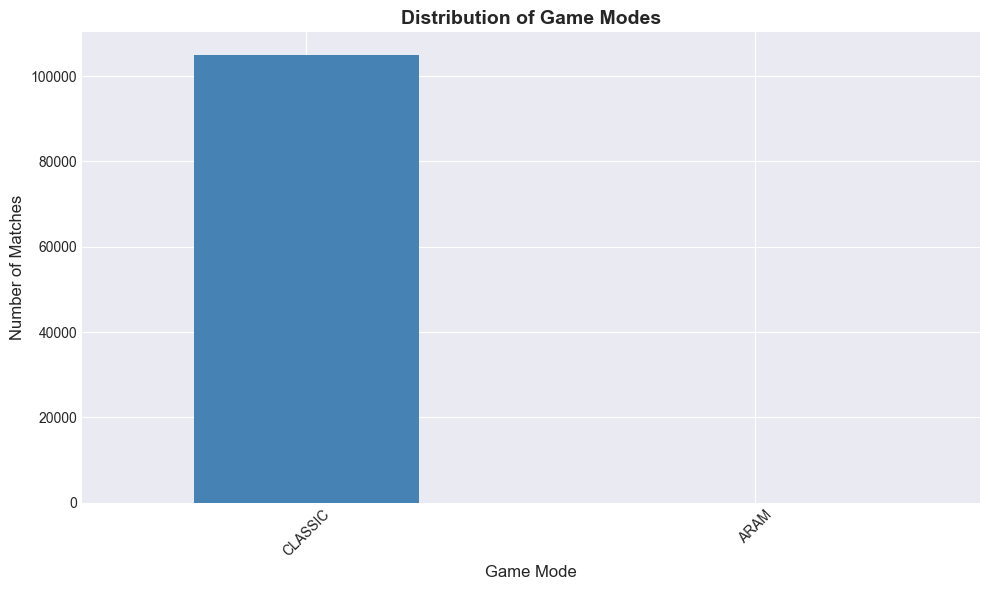

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
game_modes.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Distribution of Game Modes', fontsize=14, fontweight='bold')
ax.set_xlabel('Game Mode', fontsize=12)
ax.set_ylabel('Number of Matches', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Most played champions
champion_counts = df_combined['championName'].value_counts()
print("Top 20 Most Played Champions:")
print(champion_counts.head(20))

# Visualize top champions
fig, ax = plt.subplots(figsize=(14, 8))
top_champions = champion_counts.head(20)
top_champions.plot(kind='barh', ax=ax, color='coral')
ax.set_title('Top 20 Most Played Champions', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Games', fontsize=12)
ax.set_ylabel('Champion', fontsize=12)
plt.tight_layout()
plt.show()


Top 20 Most Played Champions:
championName
Ashe           2117
Lux            2088
Jhin           1967
Caitlyn        1842
Ezreal         1777
Vayne          1620
Yasuo          1558
Morgana        1429
Tristana       1352
Sett           1345
Amumu          1335
MissFortune    1325
Kayn           1291
MasterYi       1263
Ekko           1240
Irelia         1233
Senna          1232
Yone           1218
Teemo          1194
Lucian         1156
Name: count, dtype: int64


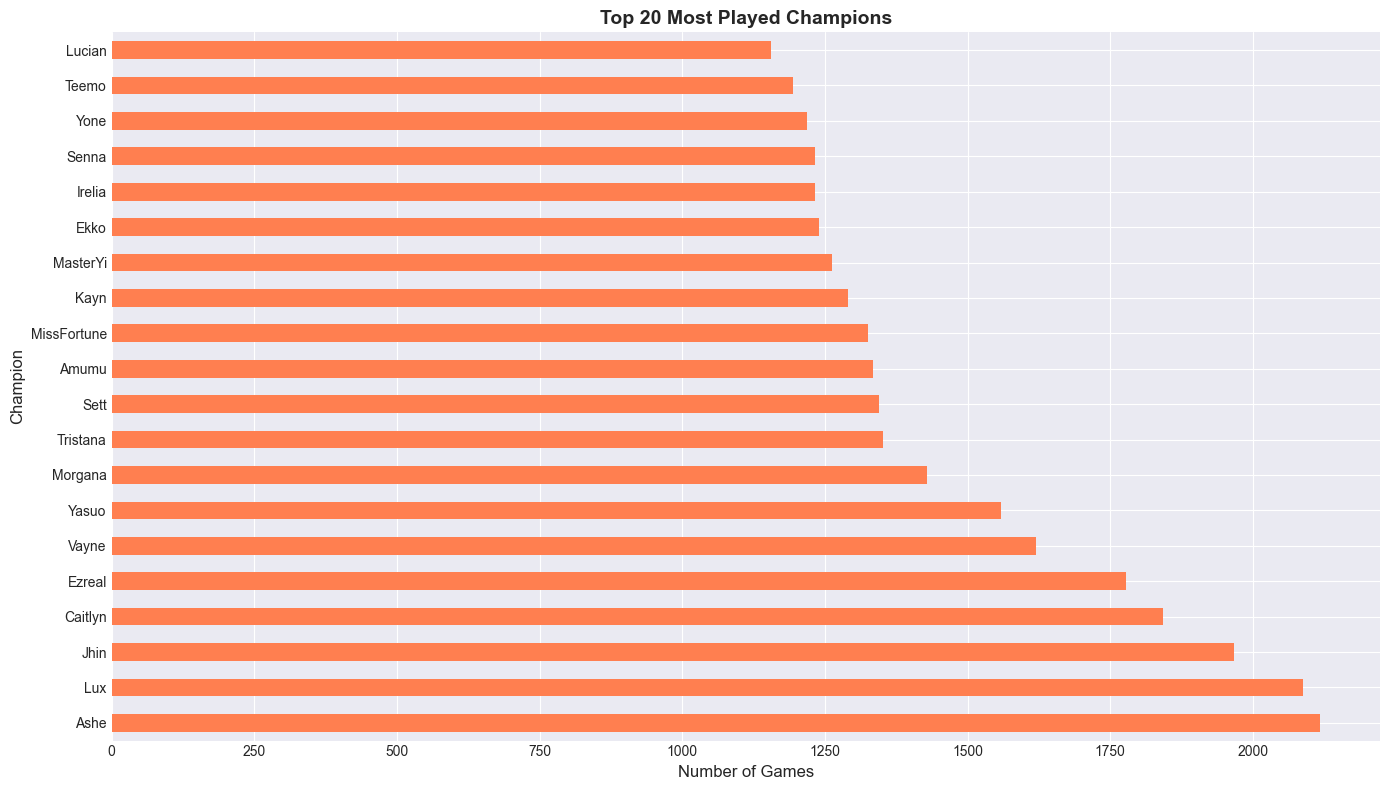

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
top_champions = champion_counts.head(20)
top_champions.plot(kind='barh', ax=ax, color='coral')
ax.set_title('Top 20 Most Played Champions', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Games', fontsize=12)
ax.set_ylabel('Champion', fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
# Champion win rates
champion_stats = df_combined.groupby('championName').agg({
    'win': ['count', 'sum', 'mean'],
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean',
    'goldEarned': 'mean'
}).round(2)

champion_stats.columns = ['Games_Played', 'Wins', 'Win_Rate', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_Gold']
champion_stats = champion_stats[champion_stats['Games_Played'] >= 50]  # Filter champions with at least 50 games
champion_stats = champion_stats.sort_values('Win_Rate', ascending=False)

print("Champion Statistics (Minimum 50 games):")
print("=" * 80)
print(champion_stats.head(20))


Champion Statistics (Minimum 50 games):
              Games_Played  Wins  Win_Rate  Avg_Kills  Avg_Deaths  \
championName                                                        
Amumu                 1335   764      0.57       5.22        6.11   
Sona                   806   462      0.57       2.54        5.63   
Shyvana                370   207      0.56       6.74        5.49   
Corki                  198   110      0.56       7.97        6.39   
Kled                   272   149      0.55       7.03        6.03   
Ornn                   260   142      0.55       4.20        5.43   
DrMundo                503   278      0.55       5.09        5.13   
Nunu                   506   275      0.54       5.04        6.04   
Darius                 703   379      0.54       6.63        6.09   
Blitzcrank             797   434      0.54       2.58        5.92   
AurelionSol             69    37      0.54       5.46        6.81   
Ashe                  2117  1148      0.54       6.07        6.

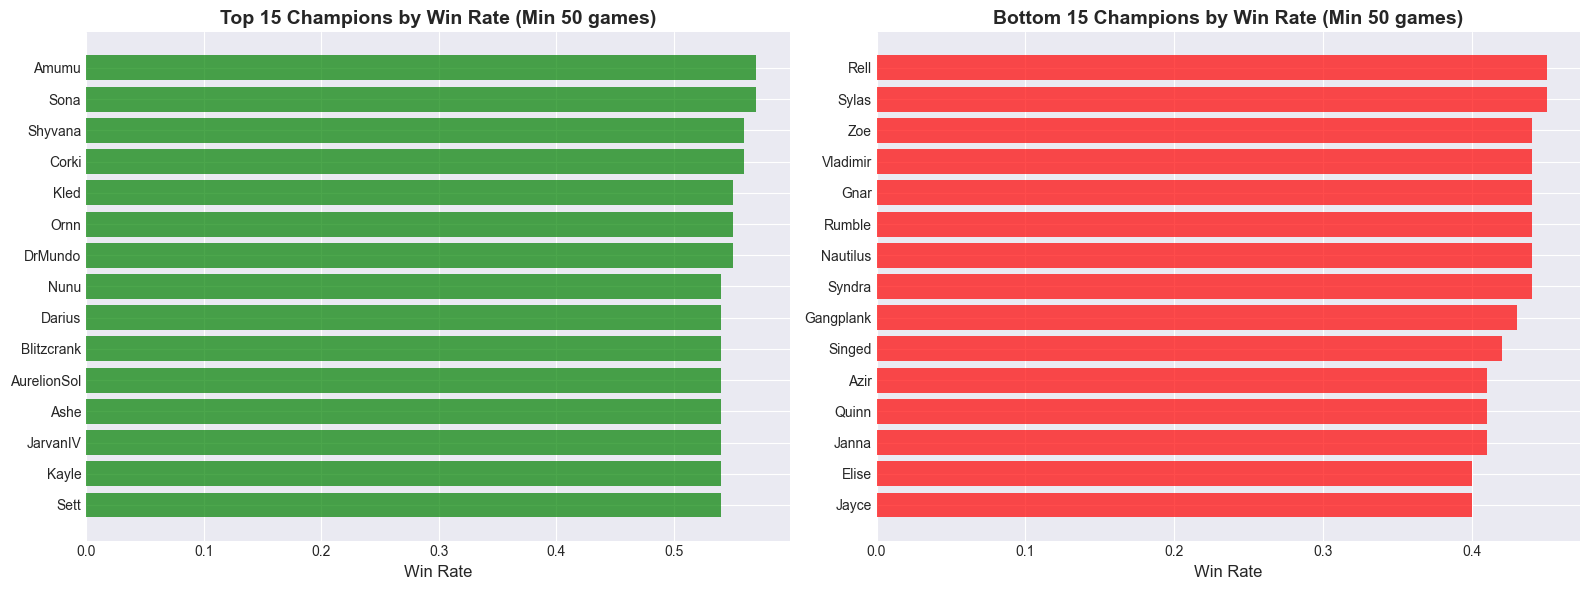

In [17]:
# Visualize top win rate champions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top win rates
top_winrate = champion_stats.head(15)
axes[0].barh(range(len(top_winrate)), top_winrate['Win_Rate'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_winrate)))
axes[0].set_yticklabels(top_winrate.index)
axes[0].set_xlabel('Win Rate', fontsize=12)
axes[0].set_title('Top 15 Champions by Win Rate (Min 50 games)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Bottom win rates
bottom_winrate = champion_stats.tail(15)
axes[1].barh(range(len(bottom_winrate)), bottom_winrate['Win_Rate'], color='red', alpha=0.7)
axes[1].set_yticks(range(len(bottom_winrate)))
axes[1].set_yticklabels(bottom_winrate.index)
axes[1].set_xlabel('Win Rate', fontsize=12)
axes[1].set_title('Bottom 15 Champions by Win Rate (Min 50 games)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [18]:
# Analyze positions
position_counts = df_combined['individualPosition'].value_counts()
print("Position Distribution:")
print(position_counts)

# Position win rates
position_stats = df_combined.groupby('individualPosition').agg({
    'win': ['count', 'mean'],
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean',
    'goldEarned': 'mean',
    'totalDamageDealtToChampions': 'mean'
}).round(2)

position_stats.columns = ['Games', 'Win_Rate', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_Gold', 'Avg_Damage']
print("\nPosition Statistics:")
print(position_stats)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Position distribution
position_counts.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Position Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Number of Games', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Position win rates
position_stats['Win_Rate'].plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Win Rate by Position', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Position', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% Win Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


Position Distribution:
individualPosition
JUNGLE     21420
TOP        20881
UTILITY    20867
MIDDLE     20854
BOTTOM     20814
Invalid      166
Name: count, dtype: int64

Position Statistics:
                    Games  Win_Rate  Avg_Kills  Avg_Deaths  Avg_Assists  \
individualPosition                                                        
BOTTOM              20814      0.50       7.32        6.13         7.49   
Invalid               166      0.05       0.11        0.26         0.30   
JUNGLE              21420      0.50       6.99        6.26         8.16   
MIDDLE              20854      0.50       7.28        6.27         6.89   
TOP                 20881      0.50       5.98        6.09         5.86   
UTILITY             20867      0.50       3.33        6.26        12.49   

                    Avg_Gold  Avg_Damage  
individualPosition                        
BOTTOM              11785.41    19385.05  
Invalid              1259.19      418.56  
JUNGLE              11304.36    166

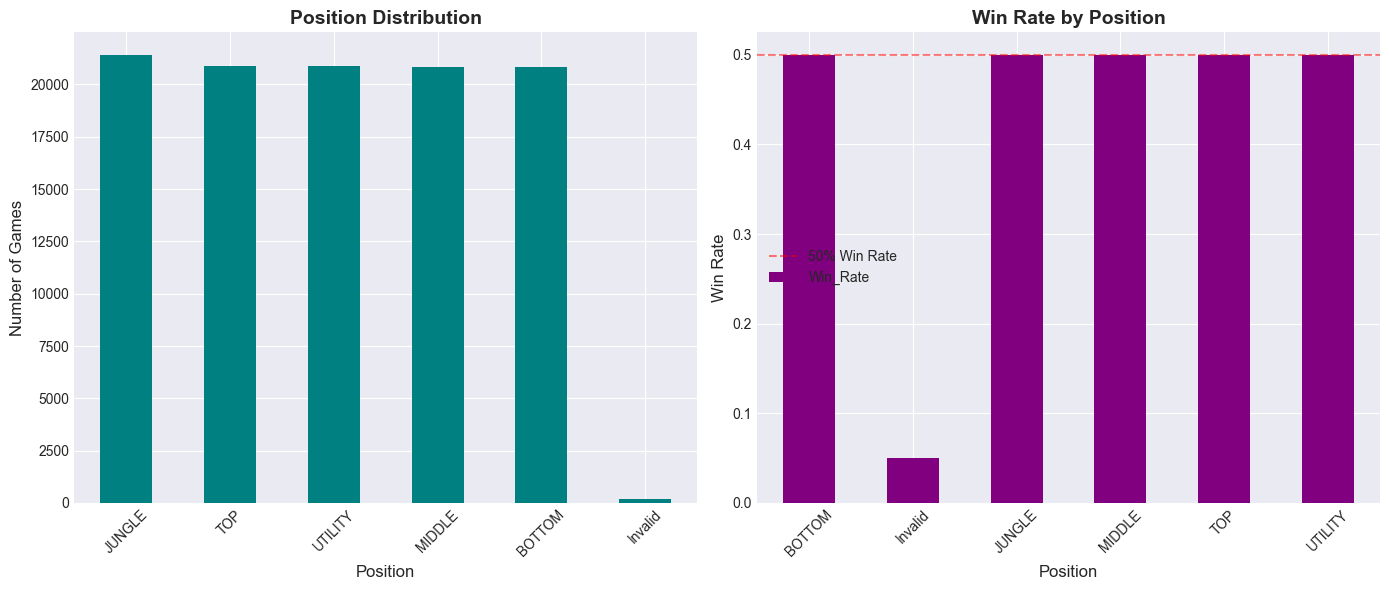

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


position_counts.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Position Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Number of Games', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


position_stats['Win_Rate'].plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Win Rate by Position', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Position', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% Win Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


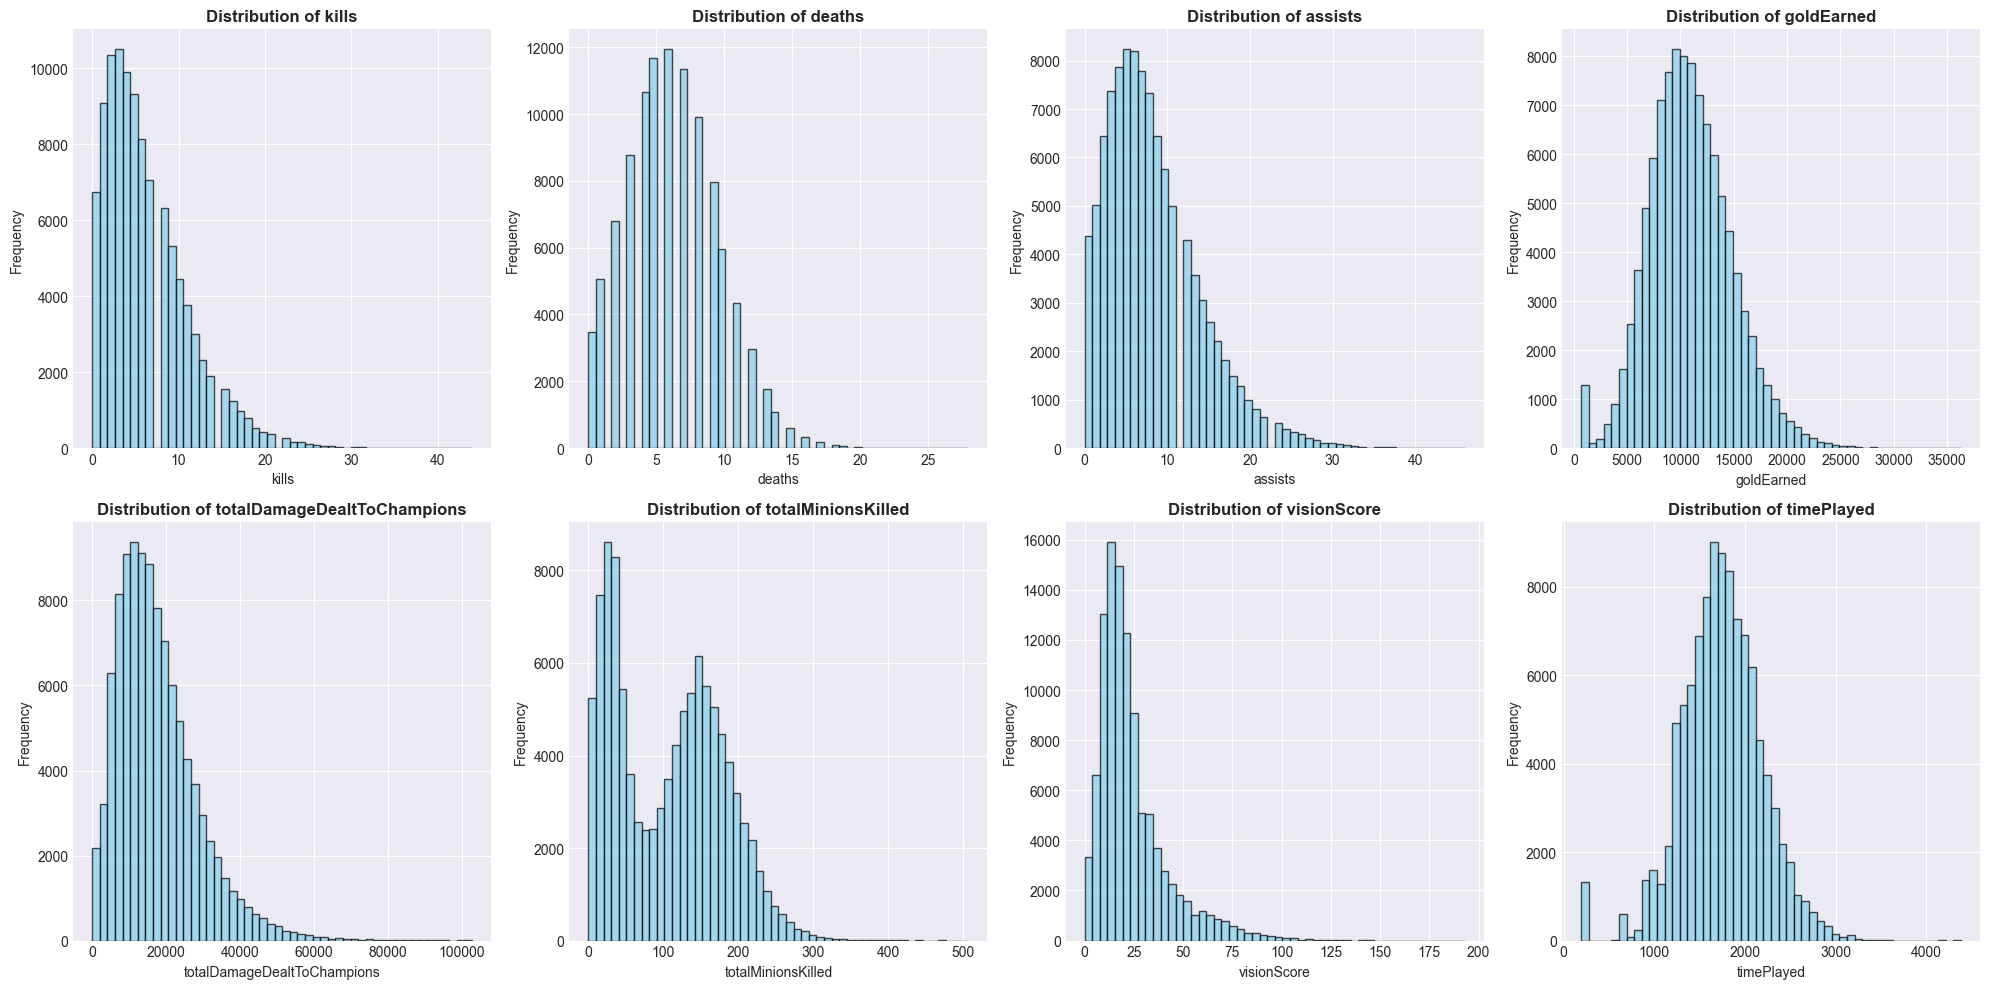

In [27]:
# Key performance metrics
performance_cols = ['kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealtToChampions', 
                    'totalMinionsKilled', 'visionScore', 'timePlayed']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(performance_cols):
    df_combined[col].hist(bins=50, ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

# Summary statistics
print("Performance Metrics Summary:")
print(df_combined[performance_cols].describe())


In [29]:
# Select numeric columns for correlation
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()
# Remove GameID if it's numeric but not meaningful for correlation
if 'GameID' in numeric_cols:
    numeric_cols.remove('GameID')

# Calculate correlation with win
correlation_with_win = df_combined[numeric_cols + ['win']].corr()['win'].sort_values(ascending=False)
correlation_with_win = correlation_with_win.drop('win')

print("Top 20 Features Most Correlated with Winning:")
print("=" * 80)
print(correlation_with_win.head(20))

print("\n\nTop 20 Features Most Negatively Correlated with Winning:")
print("=" * 80)
print(correlation_with_win.tail(20))


Top 20 Features Most Correlated with Winning:
turretTakedowns                   0.604198
KDA                               0.464998
bountyLevel                       0.417171
damageDealtToObjectives           0.356145
largestKillingSpree               0.325424
inhibitorKills                    0.319425
assists                           0.296072
kills                             0.264129
goldEarned                        0.239621
champExperience                   0.204548
champLevel                        0.199002
dragonKills                       0.196468
baronKills                        0.174992
goldSpent                         0.145538
totalDamageDealtToChampions       0.134482
totalHeal                         0.129318
longestTimeSpentLiving            0.124160
item4                             0.099430
physicalDamageDealtToChampions    0.094898
item5                             0.088020
Name: win, dtype: float64


Top 20 Features Most Negatively Correlated with Winning:
spell4Cas

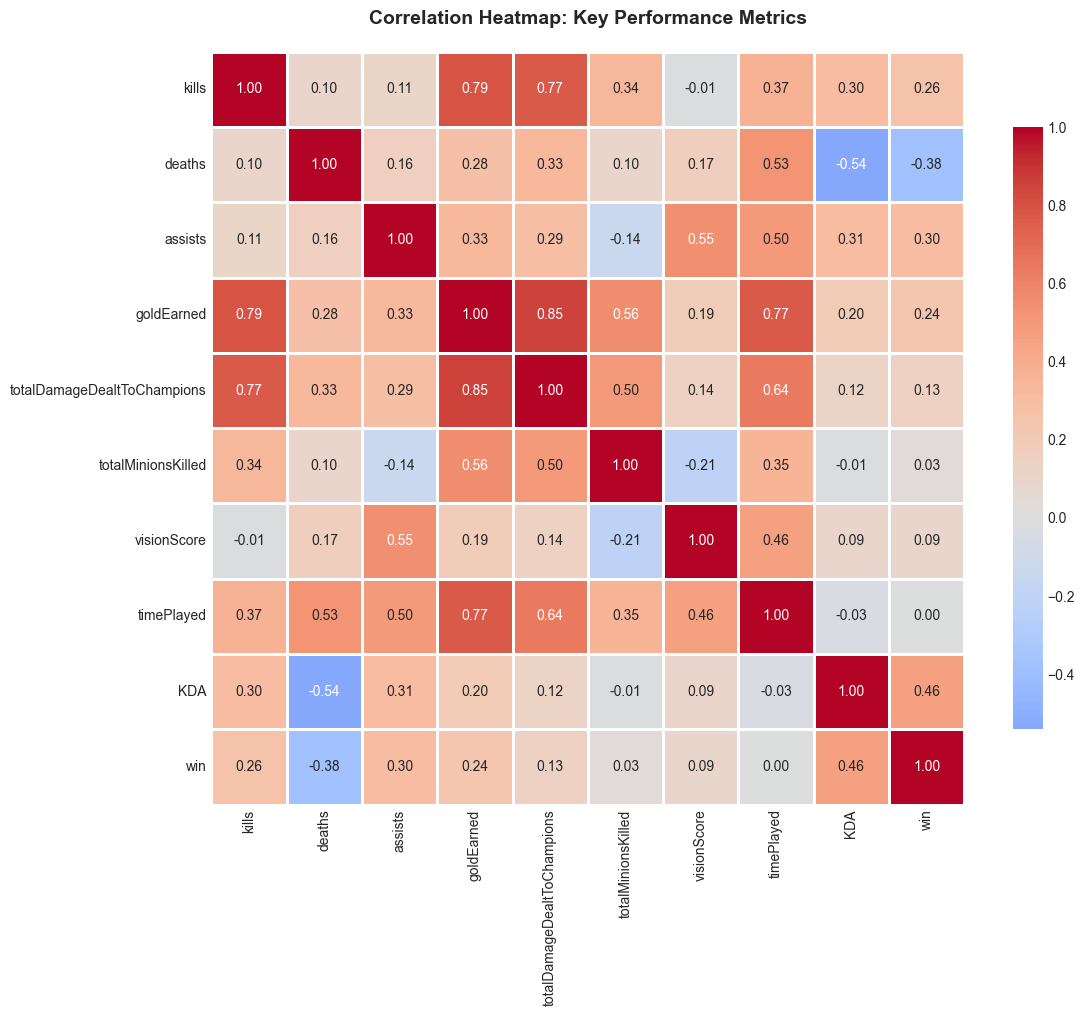

In [30]:
# Correlation heatmap for key performance metrics
key_metrics = ['kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealtToChampions',
               'totalMinionsKilled', 'visionScore', 'timePlayed', 'KDA', 'win']

corr_matrix = df_combined[key_metrics].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Key Performance Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [31]:
# Convert timePlayed from seconds to minutes
df_combined['gameDuration_minutes'] = df_combined['timePlayed'] / 60

# Game duration statistics
print("Game Duration Statistics:")
print("=" * 60)
print(f"Mean duration: {df_combined['gameDuration_minutes'].mean():.2f} minutes")
print(f"Median duration: {df_combined['gameDuration_minutes'].median():.2f} minutes")
print(f"Min duration: {df_combined['gameDuration_minutes'].min():.2f} minutes")
print(f"Max duration: {df_combined['gameDuration_minutes'].max():.2f} minutes")

# Visualize game duration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
df_combined['gameDuration_minutes'].hist(bins=50, ax=axes[0], color='orange', edgecolor='black', alpha=0.7)
axes[0].axvline(df_combined['gameDuration_minutes'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df_combined["gameDuration_minutes"].mean():.2f} min')
axes[0].set_title('Distribution of Game Duration', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Box plot by game mode
df_combined.boxplot(column='gameDuration_minutes', by='GameMode', ax=axes[1])
axes[1].set_title('Game Duration by Game Mode', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Game Mode', fontsize=12)
axes[1].set_ylabel('Duration (minutes)', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


Game Duration Statistics:
Mean duration: 29.05 minutes
Median duration: 29.00 minutes
Min duration: 3.20 minutes
Max duration: 73.07 minutes


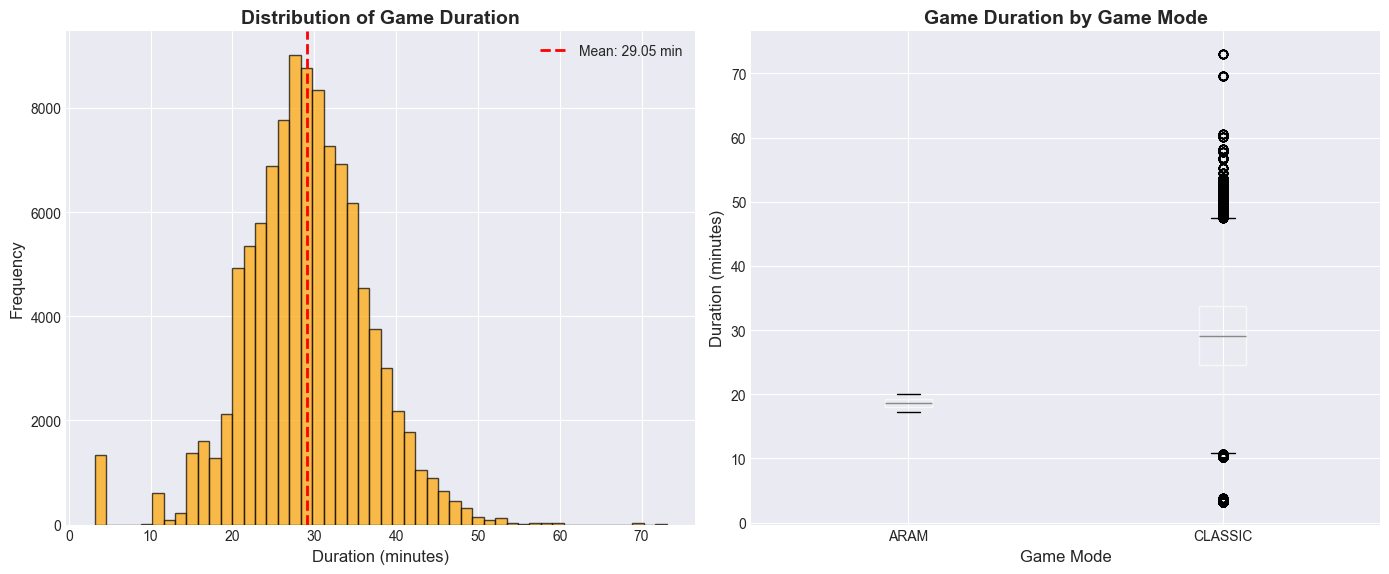

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


df_combined['gameDuration_minutes'].hist(bins=50, ax=axes[0], color='orange', edgecolor='black', alpha=0.7)
axes[0].axvline(df_combined['gameDuration_minutes'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df_combined["gameDuration_minutes"].mean():.2f} min')
axes[0].set_title('Distribution of Game Duration', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()


df_combined.boxplot(column='gameDuration_minutes', by='GameMode', ax=axes[1])
axes[1].set_title('Game Duration by Game Mode', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Game Mode', fontsize=12)
axes[1].set_ylabel('Duration (minutes)', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [33]:
# Surrender statistics
surrender_stats = df_combined.groupby('gameEndedInSurrender').agg({
    'win': 'count',
    'gameDuration_minutes': 'mean'
})

print("Surrender Statistics:")
print("=" * 60)
print(f"Games that ended in surrender: {df_combined['gameEndedInSurrender'].sum():,}")
print(f"Percentage of games surrendered: {(df_combined['gameEndedInSurrender'].sum() / len(df_combined) * 100):.2f}%")
print(f"\nAverage game duration (surrendered): {df_combined[df_combined['gameEndedInSurrender']]['gameDuration_minutes'].mean():.2f} minutes")
print(f"Average game duration (not surrendered): {df_combined[~df_combined['gameEndedInSurrender']]['gameDuration_minutes'].mean():.2f} minutes")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Surrender count
df_combined['gameEndedInSurrender'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Games Ended in Surrender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Surrendered', fontsize=12)
axes[0].set_ylabel('Number of Games', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Duration comparison
df_combined.boxplot(column='gameDuration_minutes', by='gameEndedInSurrender', ax=axes[1])
axes[1].set_title('Game Duration: Surrendered vs Not Surrendered', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Surrendered', fontsize=12)
axes[1].set_ylabel('Duration (minutes)', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


Surrender Statistics:
Games that ended in surrender: 28,760
Percentage of games surrendered: 27.39%

Average game duration (surrendered): 24.93 minutes
Average game duration (not surrendered): 30.61 minutes


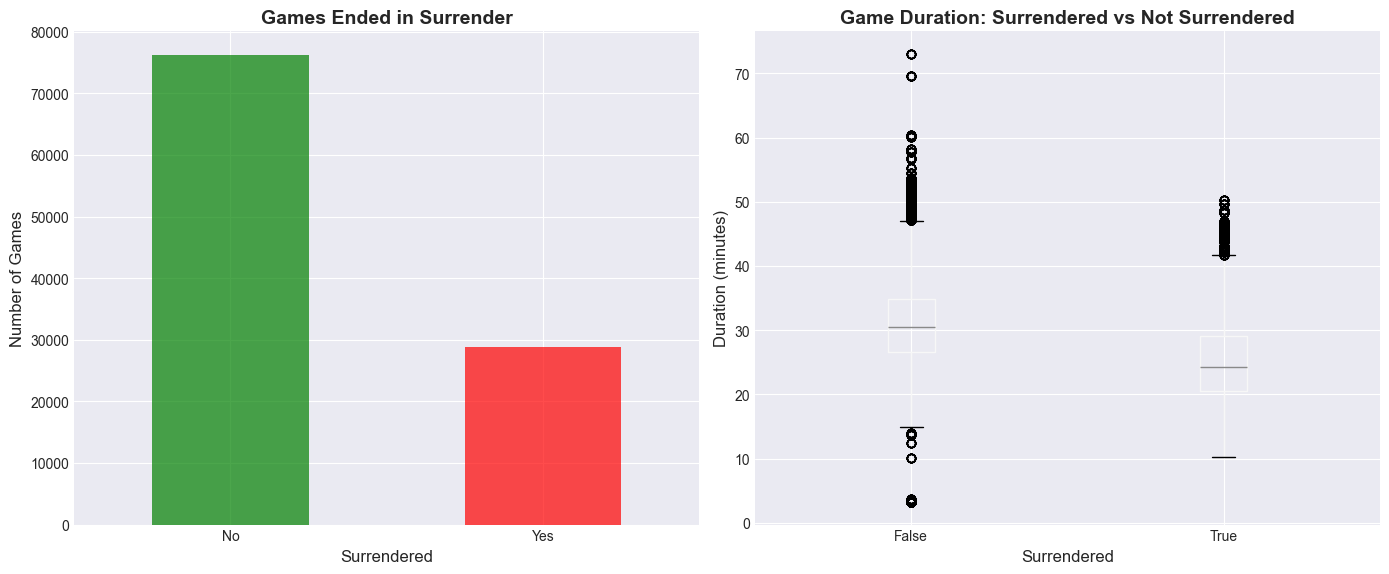

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


df_combined['gameEndedInSurrender'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Games Ended in Surrender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Surrendered', fontsize=12)
axes[0].set_ylabel('Number of Games', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)


df_combined.boxplot(column='gameDuration_minutes', by='gameEndedInSurrender', ax=axes[1])
axes[1].set_title('Game Duration: Surrendered vs Not Surrendered', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Surrendered', fontsize=12)
axes[1].set_ylabel('Duration (minutes)', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


In [35]:
# Analyze damage types
damage_cols = ['physicalDamageDealtToChampions', 'magicDamageDealtToChampions', 
               'trueDamageDealtToChampions', 'totalDamageDealtToChampions']

# Calculate damage percentages
df_combined['physical_damage_pct'] = (df_combined['physicalDamageDealtToChampions'] / 
                                      df_combined['totalDamageDealtToChampions'].replace(0, 1) * 100)
df_combined['magic_damage_pct'] = (df_combined['magicDamageDealtToChampions'] / 
                                   df_combined['totalDamageDealtToChampions'].replace(0, 1) * 100)
df_combined['true_damage_pct'] = (df_combined['trueDamageDealtToChampions'] / 
                                  df_combined['totalDamageDealtToChampions'].replace(0, 1) * 100)

# Average damage by type
damage_summary = df_combined[damage_cols].mean()
print("Average Damage by Type:")
print("=" * 60)
for col in damage_cols:
    print(f"{col}: {damage_summary[col]:,.0f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average damage by type
damage_summary[:-1].plot(kind='bar', ax=axes[0], color=['red', 'blue', 'green'], alpha=0.7)
axes[0].set_title('Average Damage by Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Damage Type', fontsize=12)
axes[0].set_ylabel('Average Damage', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Damage distribution
df_combined[damage_cols[:-1]].boxplot(ax=axes[1])
axes[1].set_title('Damage Distribution by Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Damage', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Average Damage by Type:
physicalDamageDealtToChampions: 8,791
magicDamageDealtToChampions: 7,527
trueDamageDealtToChampions: 1,268
totalDamageDealtToChampions: 17,587


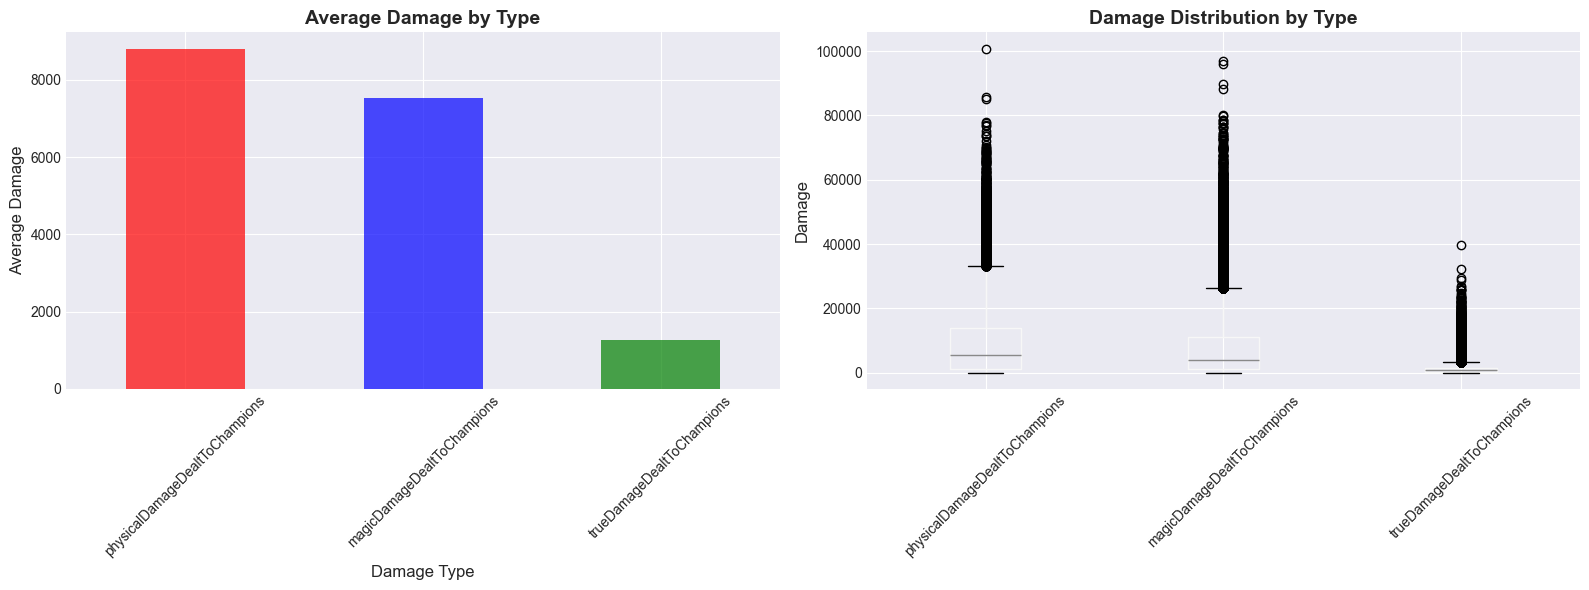

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


damage_summary[:-1].plot(kind='bar', ax=axes[0], color=['red', 'blue', 'green'], alpha=0.7)
axes[0].set_title('Average Damage by Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Damage Type', fontsize=12)
axes[0].set_ylabel('Average Damage', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

df_combined[damage_cols[:-1]].boxplot(ax=axes[1])
axes[1].set_title('Damage Distribution by Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Damage', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
# Create a summary report
print("=" * 80)
print("LEAGUE OF LEGENDS DATA ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 Dataset Overview:")
print(f"   • Total records: {len(df_combined):,}")
print(f"   • Unique games: {df_combined['GameID'].nunique():,}")
print(f"   • Unique champions: {df_combined['championName'].nunique()}")
print(f"   • Game modes: {', '.join(df_combined['GameMode'].unique())}")

print(f"\n🏆 Win Statistics:")
overall_win_rate = df_combined['win'].mean() * 100
print(f"   • Overall win rate: {overall_win_rate:.2f}%")
print(f"   • Total wins: {df_combined['win'].sum():,}")
print(f"   • Total losses: {(~df_combined['win']).sum():,}")

print(f"\n⚔️ Performance Averages:")
print(f"   • Average Kills: {df_combined['kills'].mean():.2f}")
print(f"   • Average Deaths: {df_combined['deaths'].mean():.2f}")
print(f"   • Average Assists: {df_combined['assists'].mean():.2f}")
print(f"   • Average KDA: {df_combined['KDA'].mean():.2f}")
print(f"   • Average Gold Earned: {df_combined['goldEarned'].mean():,.0f}")

print(f"\n⏱️ Game Duration:")
print(f"   • Average duration: {df_combined['gameDuration_minutes'].mean():.2f} minutes")
print(f"   • Median duration: {df_combined['gameDuration_minutes'].median():.2f} minutes")

print(f"\n🎮 Top 5 Most Played Champions:")
for i, (champ, count) in enumerate(champion_counts.head(5).items(), 1):
    print(f"   {i}. {champ}: {count:,} games")

print(f"\n🏅 Top 5 Champions by Win Rate (min 50 games):")
for i, (champ, row) in enumerate(champion_stats.head(5).iterrows(), 1):
    print(f"   {i}. {champ}: {row['Win_Rate']:.2%} ({row['Games_Played']:.0f} games)")

print("\n" + "=" * 80)


LEAGUE OF LEGENDS DATA ANALYSIS SUMMARY

📊 Dataset Overview:
   • Total records: 105,002
   • Unique games: 10,003
   • Unique champions: 156
   • Game modes: ARAM, CLASSIC

🏆 Win Statistics:
   • Overall win rate: 50.00%
   • Total wins: 52,500
   • Total losses: 52,502

⚔️ Performance Averages:
   • Average Kills: 6.17
   • Average Deaths: 6.19
   • Average Assists: 8.17
   • Average KDA: 3.37
   • Average Gold Earned: 10,907

⏱️ Game Duration:
   • Average duration: 29.05 minutes
   • Median duration: 29.00 minutes

🎮 Top 5 Most Played Champions:
   1. Ashe: 2,117 games
   2. Lux: 2,088 games
   3. Jhin: 1,967 games
   4. Caitlyn: 1,842 games
   5. Ezreal: 1,777 games

🏅 Top 5 Champions by Win Rate (min 50 games):
   1. Amumu: 57.00% (1335 games)
   2. Sona: 57.00% (806 games)
   3. Shyvana: 56.00% (370 games)
   4. Corki: 56.00% (198 games)
   5. Kled: 55.00% (272 games)

